#### This notebook contains examples for calculating correlations between features, do a Principal Component Analysis and how to show them with simple plots.

The dataset used is the [Wine recognition dataset](https://scikit-learn.org/stable/datasets/toy_dataset.html#wine-recognition-dataset) from the sklearn examples. The underlying problem is to classify 3 wine producers based on attributes of their wines. We thus have 3 classes to predict.


In [9]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [10]:
# load the data
winedata = load_wine()

In [11]:
X, y = winedata['data'], winedata['target']
# print(X.shape)
# print(y.shape)
df = pd.DataFrame(X)  # we use pands here because jupyter shows it in a nicer way than numpy arrays
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


### Correlation

In the following plot, you can select 2-3 feature dimensions of the data and plot them. All the different input dimensions are called features. In class, we only used 2 inputs so far and called them x1 and x2. Here we have 13 different ones! 
To help you in having a first idea of the data, we start by calculating the correlation between the different features. This is done by the `numpy` function below, it uses the [Pearson correlation coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient) (You do not have to read up on it, the link is if you want to know more. The numpy docs show all relevant information.).

Try to see if a particular correlation coefficient stands out and plot the 2 features against each other. Experiment also with other features and investigate their differences by plotting them against each other.

In [12]:
pd.DataFrame(np.corrcoef(X, rowvar = False))  # as you see, the calculation is done by numpy, pandas is just for showing it nicely in the notebook

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
1,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
2,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
3,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
4,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
5,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
6,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
7,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
8,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417
9,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100


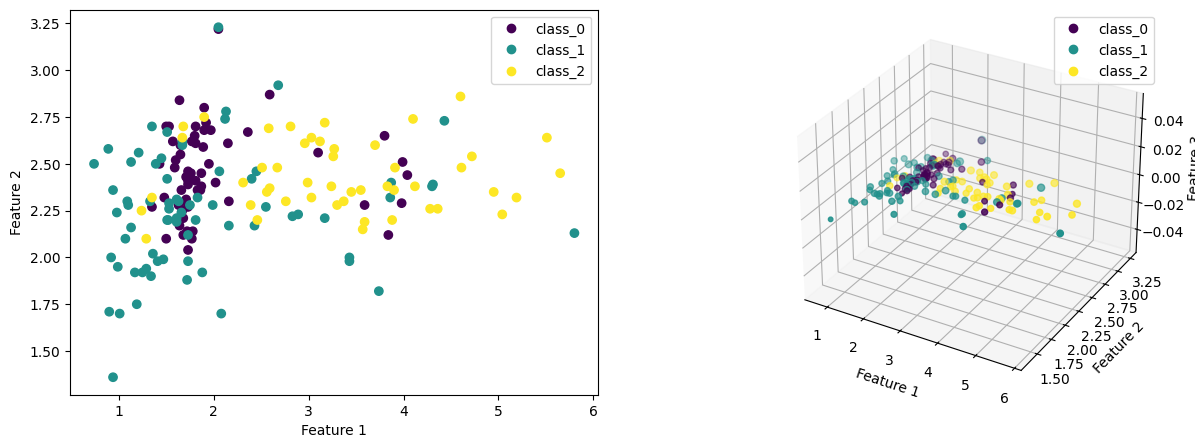

In [13]:
plot_data, labels = winedata['data'], winedata['target']
feature1 = 1
feature2 = 2
feature3 = 3
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(1, 2, 1)
scat = plt.scatter(plot_data[:,feature1], plot_data[:,feature2], c=labels)
ax1.set_xlabel(f'Feature {feature1}')
ax1.set_ylabel(f'Feature {feature2}')
ax1.legend(handles=scat.legend_elements()[0], labels=list(winedata['target_names']))
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
scat2 = plt.scatter(plot_data[:,feature1], plot_data[:,feature2], plot_data[:,feature3], c=labels)
ax2.set_xlabel(f'Feature {feature1}')
ax2.set_ylabel(f'Feature {feature2}')
ax2.set_zlabel(f'Feature {feature3}')
ax2.legend(handles=scat2.legend_elements()[0], labels=list(winedata['target_names']))
plt.show()

The past plots show that the 3 different classes are mixed together, and we can not easily separate them. Just by plotting different features. This is also expected, otherwise there would not be the need to do any advanced analysis. Nevertheless, it's always a good way to start by looking at the data you have.

### Principal Component Analysis - PCA

As next step, we want to explore if particular directions in this multidimensional dataset can show us a better split. This is where the PCA comes into play.
PCA is a technique to find directions in the data that can explain the spread and variance. It is not a model, but a mathematical method relying on matrix properties. Even though the sklearn methods sound like we fit a model, it's rather a decomposition. PCA in essence is to rearrange the features by their linear combinations. Hence, it is called a **feature extraction** technique. One characteristic of PCA is that the first principal component holds the most information about the dataset. The second principal component is more informative than the third, and so on.
 
After the transformation, we explore the different components again. Again, explore to change the components and see what it gives you.

In [14]:
# Simple PCA
pca = PCA()
Xt = pca.fit_transform(X)

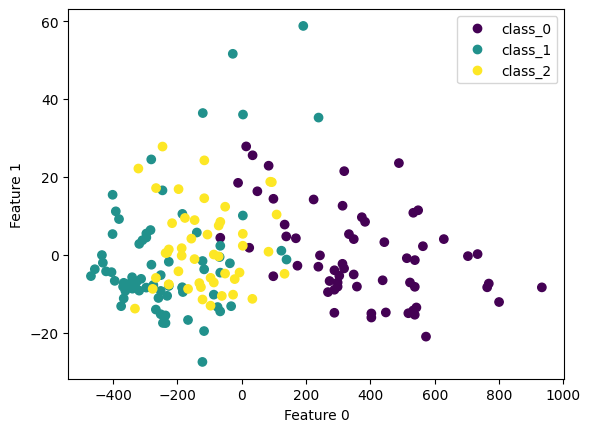

In [15]:
plot_data, labels = Xt, winedata['target']
pca_component_1 = 0
pca_component_2 = 1
fig = plt.figure()
ax1 = fig.add_subplot(1, 1, 1)
scat = plt.scatter(plot_data[:,pca_component_1], plot_data[:,pca_component_2], c=labels)
ax1.set_xlabel(f'Feature {pca_component_1}')
ax1.set_ylabel(f'Feature {pca_component_2}')
ax1.legend(handles=scat.legend_elements()[0], labels=list(winedata['target_names']))
plt.show()

The split of the data is already better. We can now see that `class_0` is more separated from the rest. The other 2 classes are still quite mixed, so we try to do better:

The PCA is quite sensitive to the scale of the different features. So if one has a strongly different order of magnitude than another, it will not perform as well.
To reduce this effect, we can subtract the mean of a feature from all of its values and divide by the standard deviation. This is called normalization. You can explore some details when looking at the respective sklearn function (`StandardScaler`).

**Q1: What range is the data after subtracting the mean and dividing by the standard deviation? Does that sound familiar to you? Can you explain why it makes sense for NN too?**

In [16]:
pca2 = PCA()
pipe = Pipeline([('scaler', StandardScaler()), ('pca', pca2)])
Xt_scaled = pipe.fit_transform(X)

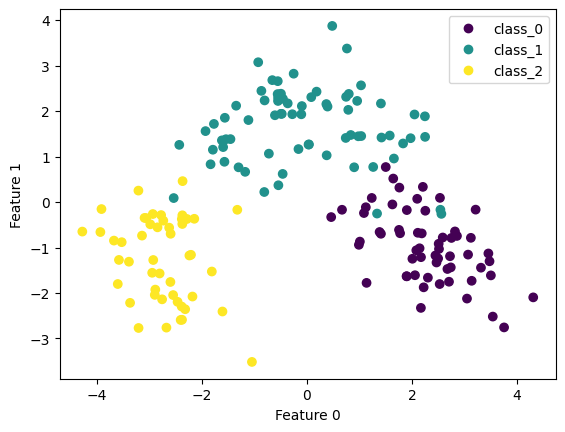

In [17]:
plot_data, labels = Xt_scaled, winedata['target']
pca_component_1 = 0
pca_component_2 = 1
fig = plt.figure()
ax1 = fig.add_subplot(1, 1, 1)
scat = plt.scatter(plot_data[:,pca_component_1], plot_data[:,pca_component_2], c=labels)
ax1.set_xlabel(f'Feature {pca_component_1}')
ax1.set_ylabel(f'Feature {pca_component_2}')
ax1.legend(handles=scat.legend_elements()[0], labels=list(winedata['target_names']))
plt.show()

As mentioned before, the first PCA components explain the data better than the later ones. Thus, plotting component 1 vs 2 gives us a good split in the data. We can see that the scaling made quite a good difference.

We have seen a method to split the data, but what does it actually mean to have these PCA components? Let's explore them:

In [20]:
# access components of pca2 - the scaled and best performing pca we have above
print(pca2.components_.shape)
pd.DataFrame(pca2.components_)

(13, 13)


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.144329,-0.245188,-0.002051,-0.239320,0.141992,0.394661,0.422934,-0.298533,0.313429,-0.088617,0.296715,0.376167,0.286752
1,-0.483652,-0.224931,-0.316069,0.010591,-0.299634,-0.065040,0.003360,-0.028779,-0.039302,-0.529996,0.279235,0.164496,-0.364903
2,-0.207383,0.089013,0.626224,0.612080,0.130757,0.146179,0.150682,0.170368,0.149454,-0.137306,0.085222,0.166005,-0.126746
3,-0.017856,0.536890,-0.214176,0.060859,-0.351797,0.198068,0.152295,-0.203301,0.399057,0.065926,-0.427771,0.184121,-0.232071
4,-0.265664,0.035214,-0.143025,0.066103,0.727049,-0.149318,-0.109026,-0.500703,0.136860,-0.076437,-0.173615,-0.101161,-0.157869
5,-0.213539,-0.536814,-0.154475,0.100825,-0.038144,0.084122,0.018920,0.258594,0.533795,0.418644,-0.105983,-0.265851,-0.119726
6,-0.056396,0.420524,-0.149171,-0.286969,0.322883,-0.027925,-0.060685,0.595447,0.372139,-0.227712,0.232076,-0.044764,0.076805
7,-0.396139,-0.065827,0.170260,-0.427970,0.156361,0.405934,0.187245,0.233285,-0.368227,0.033797,-0.436624,0.078108,-0.120023
8,0.508619,-0.075283,-0.307694,0.200449,0.271403,0.286035,0.049578,0.195501,-0.209145,0.056218,0.085828,0.137227,-0.575786
9,0.211605,-0.309080,-0.027125,0.052799,0.067870,-0.320131,-0.163151,0.215535,0.134184,-0.290775,-0.522399,0.523706,0.162116


The PCA components have shape 13x13 which means that we have **13 components of 13 dimensions each**.

Where do we have the number 13 from? The data! Remember, the input dataset has 13 features we can use for predictions. The PCA components related to those features, because we can not have more components than features. In fact, the components are a linear combination of the features. The values of 1 pca components (13x1 shape) show how much of each real feature to take to go a step along the PCA component direction.

If we look at the first PCA component, we can see how strongly it depends on a given feature. values lower than -0.5 or above 0.5 show that the PCA component is strongly dependent on that feature. It is thus good to explain spread in the data and is often better to base a prediction on. 

For now, we leave the PCA. **We have seen how it helps us to identify which features are potentially more interesting and how to explain data. It is further a suitable technique to get a better understanding by plotting several of its components.**